In [327]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.datasets import make_regression
from formulaic import Formula

# We import the linear model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from formulaic import model_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression


## 1. Data Analysis of our dataset


This Dataset indicates average salary by position title and grade for full-time regular employees. Data excludes elected, appointed, non-merit and temporary employees. Underfilled positions are also excluded from the dataset. Update Frequency : Annually


In [345]:
# we extract the data from
# https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download

# We load the data and drop the columns that are not useful for our study.
jobs = pd.read_csv('dataset/ds_salaries.csv')
jobs = jobs.dropna().drop("Unnamed: 0", axis=1).drop("employee_residence", axis=1).drop(jobs.query("employment_type == 'FL'").index).drop("salary_currency", axis = 1).drop("salary", axis = 1)
jobs

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,100,US,M
603,2022,SE,FT,Data Engineer,126000,100,US,M
604,2022,SE,FT,Data Analyst,129000,0,US,M
605,2022,SE,FT,Data Analyst,150000,100,US,M


----

**Notes**

- **Employement type:** 

FT -> Full time, PT -> Part Time, CT -> Contractor

- **Experience Level:** 

MI -> Mid Level, SE -> Senior Level, EN -> Entry, EX -> Expert

- **Company Size:** 

S -> Small, M -> Medium, L -> Large 

---

Lets first play a little with our dataset. 

I want to know the most payed and least payed job

In [330]:
# we order the dataset by the average salary
salaries = jobs.sort_values(['salary_in_usd'], ascending=False)
salaries.head(1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,100,US,L


In [331]:
salaries.tail(1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
176,2021,MI,FT,Data Scientist,2859,0,MX,S


- So we can see that the most payed on this dataset is a full-time Expert Principal Data Engineer from a Large company in the USA. 

- And the least payed job from this dataset is a full-time Medium level Data scientist from a Small company in Mexico.

---

Now we want to study whats the relation between the expertise and the salary. 

In other words, we want to know that if the salary is proportional to the expertise in the field.

## 2. Salaries between Experience levels

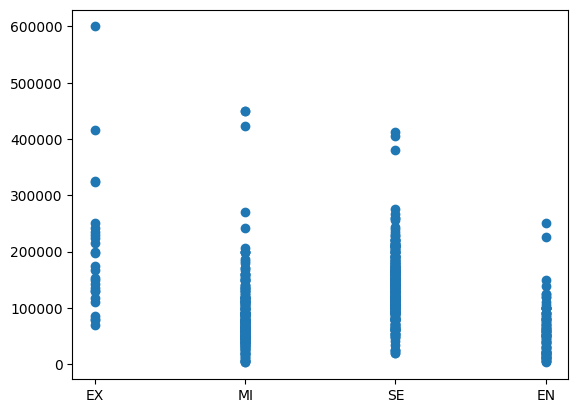

In [332]:
plt.scatter(salaries["experience_level"], salaries["salary_in_usd"])

Upon this graph we can only see that the Entry and Medium Level are the least payed.

Also we observe that the quantity of Expert people is very few compared to the others, and the salary doesnt seem to affect that much from the range of salaries of Medium level programmers.

So lets analyze based on the job title

In [333]:
grouped_jobs = jobs.groupby('job_title')


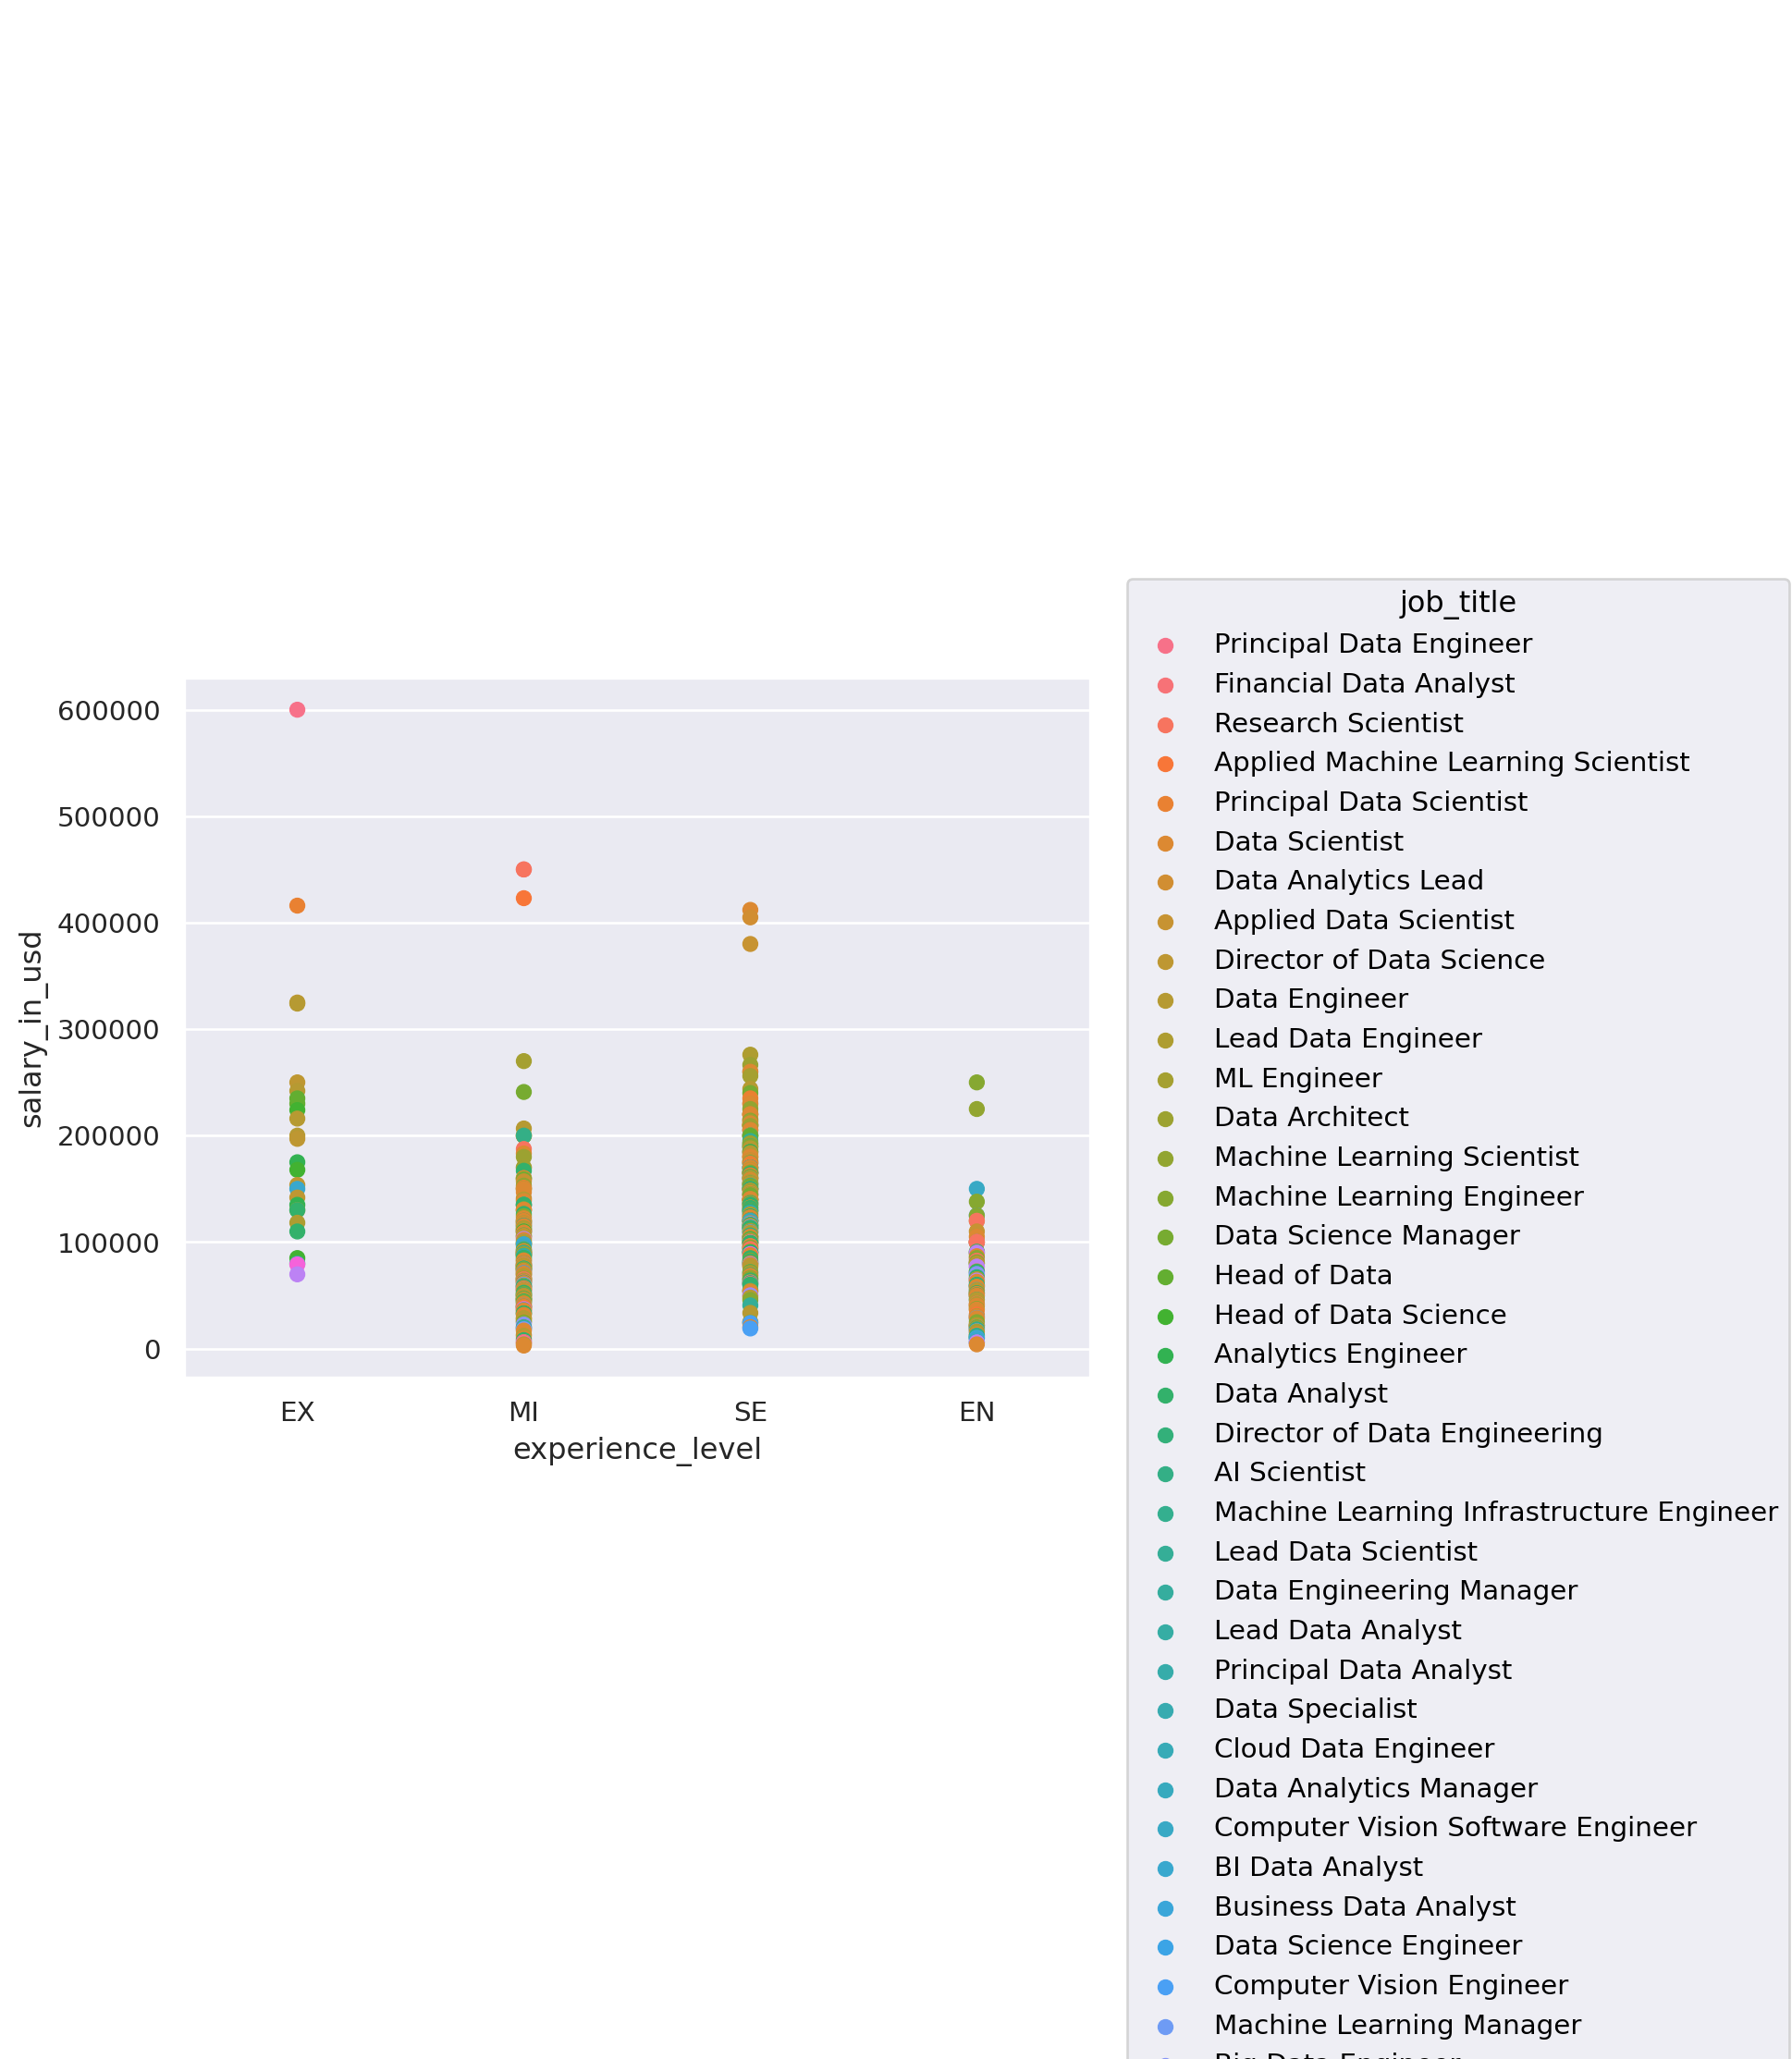

In [334]:
# We group by job title
(
    so.Plot(data = salaries, x = "experience_level", y = "salary_in_usd", color="job_title")
    .add(so.Dot())
)

In [335]:
jobs["salary_in_usd"].mean()

112724.38971807629

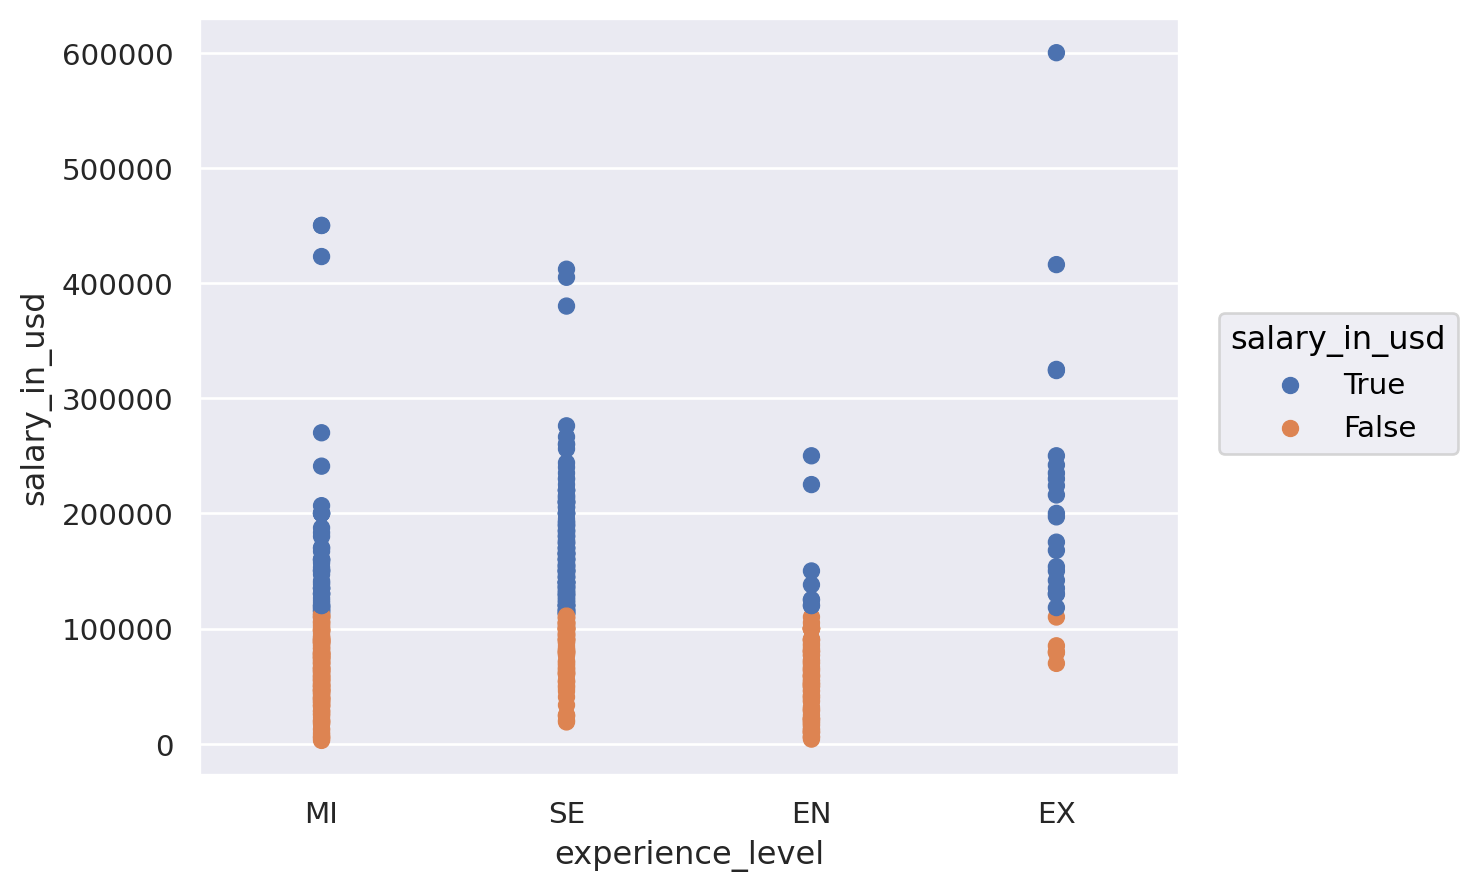

In [336]:
plot = (
    so.Plot(data=salaries, x="experience_level", y="salary_in_usd", color= jobs["salary_in_usd"] > 112724)
    .add(so.Dot())
)

# Display the plot
plot


## 3. Employment types

Lets now study the evolution through the years

In [337]:
jobs.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M


<Axes: xlabel='work_year', ylabel='salary_in_usd'>

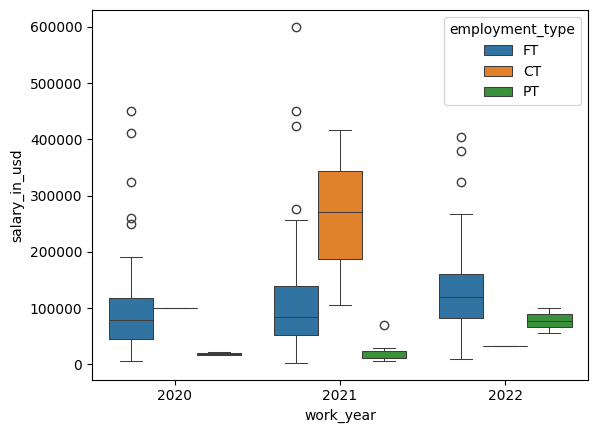

In [338]:
sns.boxplot(x=jobs["work_year"], y = jobs["salary_in_usd"], hue = jobs["employment_type"], linewidth=.75)


We can now easily see the evolution of salaries throughout the years between contractors, part-times, full-times

## Lets make Linear Regression to predict salaries in USD based on remote_ratio



In [346]:
jobs.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M


In [347]:
# We create a new dataset with only the columns that we are going to use
jobs1 = jobs[["salary_in_usd", "experience_level"]]
jobs1.head(3)

,salary_in_usd,experience_level
0,79833,MI
1,260000,SE
2,109024,SE


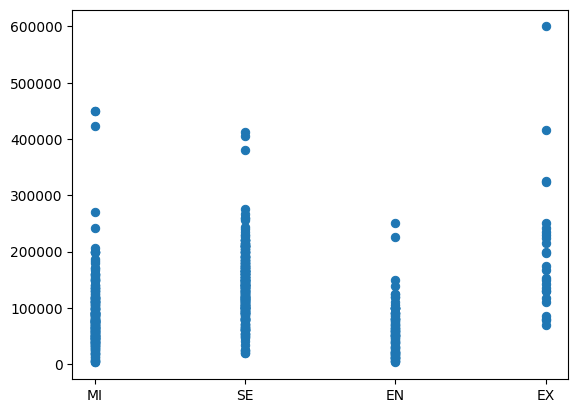

In [348]:
# Lets graph the data
plt.scatter(x=jobs1["experience_level"], y = jobs1["salary_in_usd"], linewidth=.75)

In [349]:
# Now we split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(jobs1[["experience_level"]], jobs1["salary_in_usd"], test_size=0.2, random_state=0)

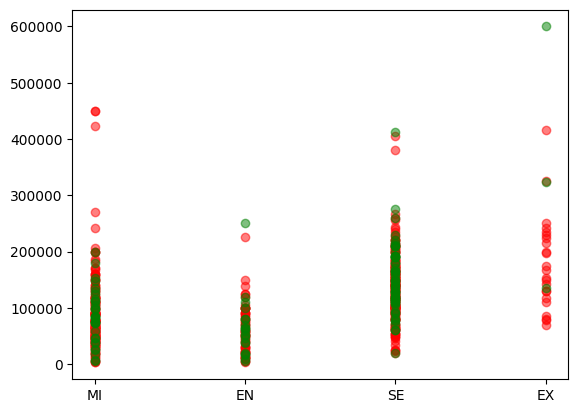

In [ ]:
# Lets graph the new split data
plt.scatter(x=X_train["experience_level"], y = y_train, label="Training Data", color = "r", alpha=0.5)
plt.scatter(x=X_test["experience_level"], y = y_test, label="Testing Data", color = "g", alpha=0.5)

In [350]:
# One-hot encode the 'experience_level' column
X_train_encoded = pd.get_dummies(X_train, columns=['experience_level'])
X_test_encoded = pd.get_dummies(X_test, columns=['experience_level'])

# Create the linear regression model
LR = LinearRegression()
LR.fit(X_train_encoded, y_train.values)


LinearRegression()

In [351]:
# We use model to predict the test data
y_pred = LR.predict(X_test_encoded)

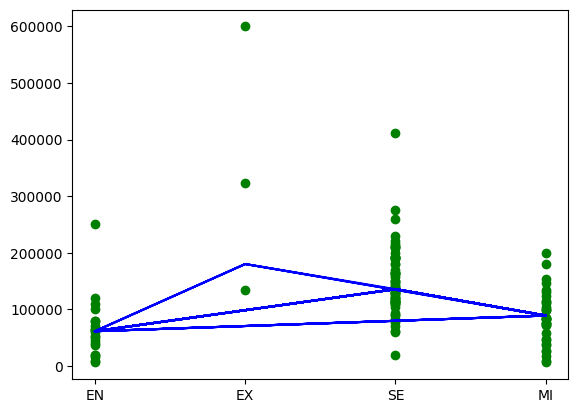

In [352]:
# Lets plot the data and the prediction
plt.plot(X_test["experience_level"], y_pred, color = "b", label="Prediction")
plt.scatter(X_test["experience_level"], y_test, color = "g", label="Actual Data")

Hacer linear regr o Ridge no me ayuda en nada, soy un bobin

## a:  Ridge Regression: We want to predict salaries in USD based on variables like:
- work year 
- experience level 
- employment type 
- job title 
- remote ratio 
- company location 
- company size

In [ ]:
jobs.head(3)

In [ ]:
# We create a new dataset with only the columns that we are going to use
jobs2 = jobs[["work_year", "experience_level", "employment_type", "salary_in_usd", "remote_ratio"]]
jobs2.head(3)

In [ ]:
jobs2 = jobs.drop("job_title", axis=1).drop("company_location", axis=1)
jobs2 = pd.get_dummies(jobs2, columns = ["company_size","experience_level", "employment_type"], dtype = float)
jobs2.head(3)

In [ ]:
# We make the correlation matrix
correlation = jobs2.corr()

# We plot the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
# Now lets get the higher correlation values
correlation["salary_in_usd"].sort_values(ascending=False)

In [ ]:
correlation["salary_in_usd"].sort_values(ascending=False).index


In [ ]:
# Once we have the correlation matrix we can start with the linear regression

# We define the formula
formula = Formula("salary_in_usd ~ " + " + ".join(correlation["salary_in_usd"].sort_values(ascending=False).index))

# We get the model matrix
y, X =  Formula(formula).get_model_matrix(jobs2)

# We split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




---